Accuracy: 0.9929669805697938

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.99      1.00      1.00     33320

    accuracy                           0.99     33556
   macro avg       0.50      0.50      0.50     33556
weighted avg       0.99      0.99      0.99     33556



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


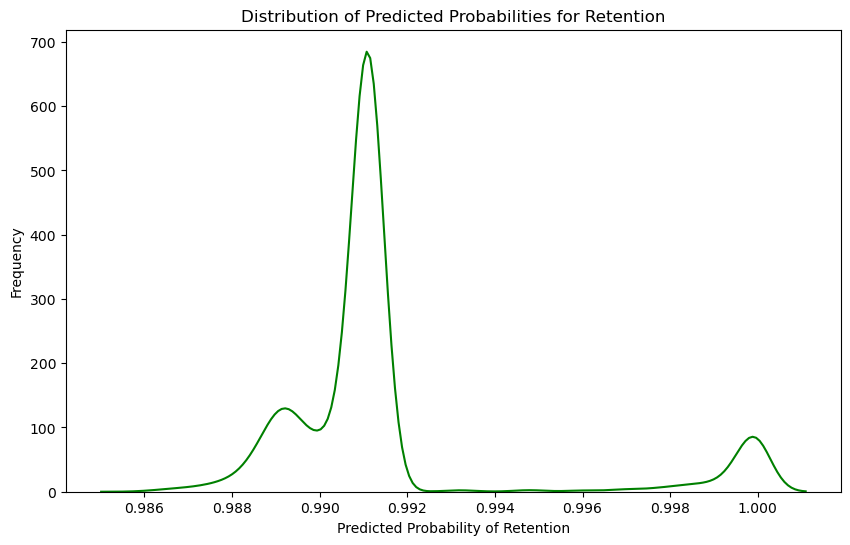

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv('./data/만료및탈퇴회원.csv')


df['is_churned'] = np.where(df['memberstatus'] == 88, 1, 0)

# 3. 서비스 유지 여부(Target) 설정
# 기존의 'is_churned'가 1이면 탈퇴, 0이면 유지였으므로 반대로 설정
df['is_retained'] = df['is_churned'].apply(lambda x: 1 if x == 0 else 0)

# features, target
features = ['statusgroup_10_count', 'statusgroup_20_count', 'statusgroup_30_count',
            #  'statusgroup_40_count', 'statusgroup_50_count'
            ]

target = 'is_retained'

X = df[features]
y = df[target]

# 5. 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=12345)

# 6. 데이터 스케일링 (원한다면 생략 가능)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=12345)
model.fit(X_train_scaled, y_train)

# 8. 예측
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # 유지될 확률

# 9. 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. 예측 확률 시각화
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_prob, color='green')
plt.title('Distribution of Predicted Probabilities for Retention')
plt.xlabel('Predicted Probability of Retention')
plt.ylabel('Frequency')
plt.show()